In [1]:
%matplotlib inline

from math import *
from pylab import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
BITS_PER_SAMPLE = 16        # bits
SAMPLE_RATE     = 125e6     # Hz
# SAMPLE_RATE     = 5e6     # Hz

### 0. Helper Functions

In [3]:
def bytes_from_bin_file(fileName, chunkSize=2):
    with open(fileName, 'rb') as f:
        while True:
            chunk = f.read(chunkSize)
            if chunk:
                yield chunk
            else:
                break

### 1. Original (No Memory Extension)

##### 1.1 Calculations

In [4]:
maxMemBytes = 16**4
maxNumMemSamples = maxMemBytes * 8 / BITS_PER_SAMPLE

print('Per channel:')
print('Max memory allocated  = {:>5} = 16^{:<2} bytes'.format(int(maxMemBytes), int(log2(maxMemBytes)/log2(16))))
print('Max number of samples = {:>5} =  2^{:<2}'.format(int(maxNumMemSamples), int(log2(maxNumMemSamples))))

Per channel:
Max memory allocated  = 65536 = 16^4  bytes
Max number of samples = 32768 =  2^15


In [5]:
signalPeriod = maxNumMemSamples / SAMPLE_RATE
signalFrequency = 1 / signalPeriod

print('Singal period   = {:>10.5f} μs'.format(signalPeriod * 1e6))
print('Signal frequncy = {:>10.5f} Hz'.format(signalFrequency))

Singal period   =  262.14400 μs
Signal frequncy = 3814.69727 Hz


#### 1.2 Data & Graphs

In [6]:
ch1 = []

dataFileName = '3815Hz_32768_125MHz_raw/data_file_2024-02-08_08-24-03'

# dataFileName = '7629Hz_16384_125MHz_volts/data_file_2024-02-08_08-12-10'
# dataFileName = '7629Hz_16384_125MHz_raw/data_file_2024-02-08_07-44-26'
# dataFileName = '7629Hz_16384_5MHz_raw/data_file_2024-02-08_11-31-37'

for chunk in bytes_from_bin_file(dataFileName + '.bin'):
    ch1.append(int.from_bytes(chunk, byteorder='little', signed=True))

In [7]:
nSamples = len(ch1)
# tSamples = (nSamples / SAMPLE_RATE) * 1e6
tSamples = (nSamples / 5e6) * 1e6
totDecFactor = maxNumMemSamples / nSamples

print('Sampling time = {} μs'.format(tSamples))
print('Number of samples saved = {}'.format(nSamples))
print('Total decimation factor = {}'.format(totDecFactor))

Sampling time = 6560.0 μs
Number of samples saved = 32800
Total decimation factor = 0.9990243902439024


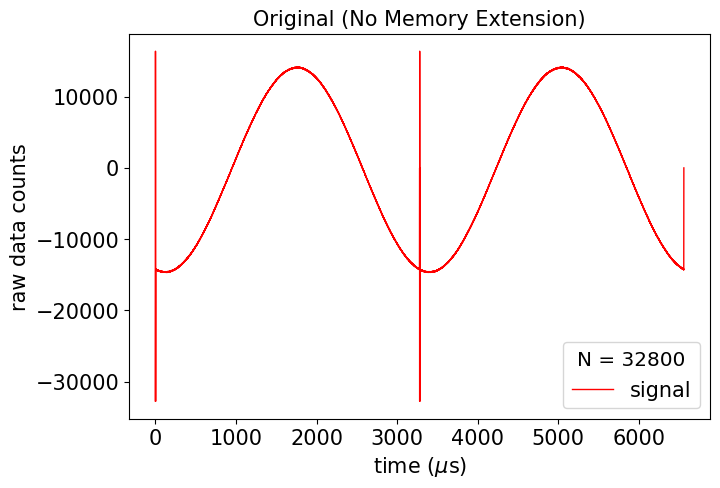

In [8]:
t1 = np.linspace(0, tSamples, nSamples)

plt.figure(figsize=(7.5, 5))

plt.plot(t1, ch1, 'r-', lw=1, label="signal")

plt.title('Original (No Memory Extension)', fontsize=15)
plt.xlabel(r'Time ($\mu$s)', fontsize=15)
plt.ylabel('Raw Data Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 15})

plt.show()

In [9]:
# ch1_np = np.array(ch1)

# np.savetxt(dataFileName + '.txt', np.c_[t1, ch1_np])